In [6]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

# Linear Models

## Linear models for regression

The general prediction formular for a linear model looks as follows:

$$\hat{y} = w[0] * x[0] + w[1] * x[1] + \cdots + w[p] * x[p] + b$$

* $x[0]$ to $x[p]$ denotes the features (the numbers of features is $p$)
* $w$ and $b$ are parameters of the model that are learned
* $\hat{y}$ is the prediction the model makes

w[0]: 0.393906  b: -0.031804


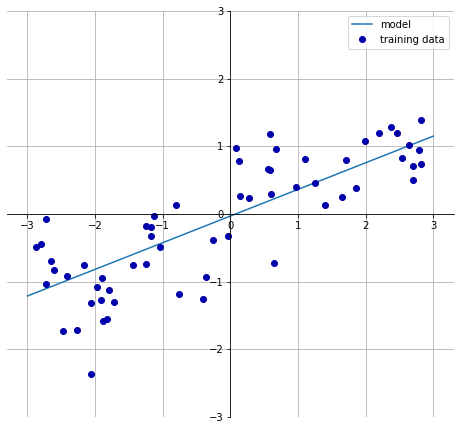

In [7]:
# predictios of a linear model on the wave dataset
mglearn.plots.plot_linear_regression_wave()

__OBS__: For datasets ith many features, linear models can be very powerful

## Linear Regression (Ordinary Least Squares)

* Classic and simple method for linear regression
* Finds the parameters $w$ and $b$ that minimize the mean squared error between predictions and the true regression targets $y$ on the training set
* Doesn't take parameters $\to$ is a benefit, but also has no way no control model complexity

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [12]:
# slope parameters (w) and stored in coef_ attbiute
# intercept (b) is stored in the intercept_ attribute
print("lr.coef_: {}".format(lr.coef_)) # one entry per feature, in this case, 1
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [13]:
# let's look at the training set and test set performance
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


The score (in this case the $R^2$) is around $0.66$, which is not very good. We can see that the scores on the training and test sets are very close, this means we are likely underfitting and not overfitting (the model even has poor performance on the training data). This usually happens in lower-dimensional datasets. Let's try with a more complex dataset:

In [14]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [15]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.95
Test set score: 0.61


Now, we can see that the score in the training set is much higher than before, but the test set is much worse, showing that the model tends to overfitting. So, we need to find a model that allows us to control complexity. Another alternative is _ridge regression_

## Ridge Regression

* Also a linear model for regression, same formula as linear regression (least squares)
* Difference on the coefficients ($w$) $\to$ The magnitude of the coefficients need to be as small as possible (close to zero), this means each feature should have little effect in the outcome (aka having a small slope)
* This constraint is called __regularization__ $\to$ Regularization means to explicitly restricting a model to avoid overfitting
* The particular regularization used by ridge regression is known as __L2__ regularization

Let's try again the same dataset as before but with ridge regression:


In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


* As you can see, the set score is higher than for linear regression and the test score is lower, this makes sense because ridge regression is a more restricted model, so we are less likely overfit

* Less complex models means worse performance on the training set, but better in generalization

* We can adjust the ridge regression with the $\texttt{alpha}$ parameter (by default 1)
   * Incresing $\texttt{alpha}$ forces coefficients to be more restrictive (get close to zero)
   * Decreasing $\texttt{alpha}$ allows coefficients to be less restrictive (not close to zero)
   
Now we try with a value of $\texttt{alpha=10}$. Before we tested with $\texttt{alpha=1}$

In [19]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


We see that, in this case, it doesn't help increasing the value of $\texttt{alpha}$ $\to$ it depends on the dataset. Let's try a smaller value, in this case, of $\texttt{alpha=0.1}$

In [20]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


So, in this case, a value of $\texttt{alpha=0.1}$ performs well. We can see how the value of coefficients changes depending of the value of $alpha$:

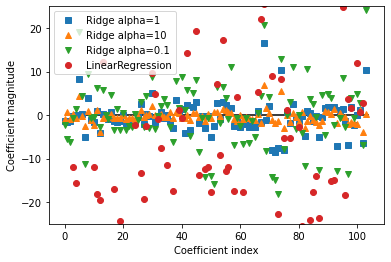

In [23]:
# Comparing coefficient magnitudes for ridge regression
# with different values of alpha and linear regression

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

As we can see, a higher value of $\texttt{alpha}$, less the value of the coefficients and vice versa

The amount of training data available also has influence on regularization. We can plot all the _learning curves_ (shows how the model learns based on the amoung of training data) for an $\texttt{alpha=0.1}:

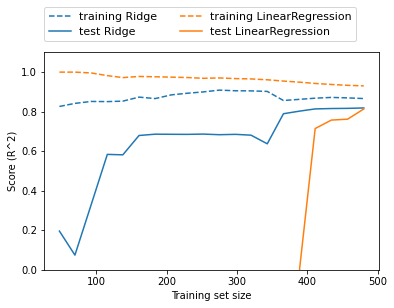

In [24]:
mglearn.plots.plot_ridge_n_samples()

Some observations of the graph above:
* Linear regression doesn't learn anything at all for less than 400 data points
* To more amount of data, both models improve
* With enough training data, regularization becomes less important
* More data $\to$ Harder to overfit